In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from packages.c45 import *
from packages.importer import *
from packages.binaryTree import *

path = 'datasets/iris_min.csv'
problem = import_csv(path)
data = problem.data
attributes = problem.attributes
classcolumn = problem.classcolumn
classes = problem.classes

tree = decisionTree(data, attributes, classes, classcolumn, BinaryTree(), threshold = 0.1)
print(tree)

nodeType: decision - value: sepal.length - limit: 5.5
|-nodeType: decision - value: sepal.width - limit: 2.7
  |-nodeType: decision - value: sepal.length - limit: 4.9
    |-nodeType: decision - value: sepal.length - limit: 4.5
      |-nodeType: leaf - value: Setosa - supportCount: 1 - confidence: 1/1
      |-nodeType: decision - value: sepal.width - limit: 2.4
        |-nodeType: leaf - value: Versicolor - supportCount: 1 - confidence: 1/1
        |-nodeType: leaf - value: Virginica - supportCount: 1 - confidence: 1/1
    |-nodeType: leaf - value: Versicolor - supportCount: 9 - confidence: 9/9
  |-nodeType: leaf - value: Setosa - supportCount: 46 - confidence: 46/47
|-nodeType: decision - value: sepal.width - limit: 3.6
  |-nodeType: decision - value: sepal.length - limit: 6.2
    |-nodeType: leaf - value: Versicolor - supportCount: 25 - confidence: 25/37
    |-nodeType: decision - value: sepal.length - limit: 7.0
      |-nodeType: leaf - value: Virginica - supportCount: 25 - confidenc

Si es el primer atributo, entonces es el eje X, sino es Y

sepal.length
sepal.width


(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


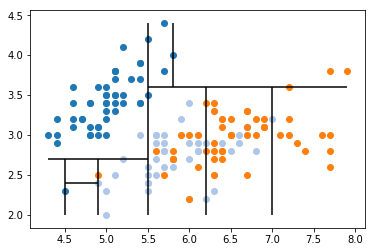

In [2]:
ejex = attributes[0]
print(ejex)
ejey = attributes[1]
print(ejey)
xmin = data[ejex].min()
xmax = data[ejex].max()
ymin = data[ejey].min()
ymax = data[ejey].max()
def recursivo(plt, tree, ejex, ejey, xmin, xmax, ymin, ymax):
    left = tree.left
    right = tree.right
    if tree.cargo.type == 'decision':
        attribute = tree.cargo.value
        if attribute == ejex:
            plt.vlines(x = tree.cargo.limit, ymin = ymin, ymax = ymax)
            recursivo(plt, left, ejex, ejey, xmin, tree.cargo.limit, ymin, ymax)
            recursivo(plt, right, ejex, ejey, tree.cargo.limit, xmax, ymin, ymax)
        if attribute == ejey:
            plt.hlines(y = tree.cargo.limit, xmin = xmin, xmax = xmax)
            recursivo(plt, left, ejex, ejey, xmin, xmax, ymin, tree.cargo.limit)
            recursivo(plt, right, ejex, ejey, xmin, ymax, tree.cargo.limit, ymax)

recursivo(plt, tree, ejex, ejey, xmin, xmax, ymin, ymax)

color = cm.get_cmap(name='tab20')
color(0.1)
i = 0.0
for c in classes: 
    dataTemp = data.loc[data[classcolumn] == c]
    x = dataTemp[attributes[0]]
    y = dataTemp[attributes[1]]
    plt.scatter(x, y, marker='o', c=color(i))
    i= i+0.05
plt.show()


